In [1]:
import pandas as pd

##Data Preprocessing and Exploration

In [2]:
df = pd.read_excel('bankruptcy-prevention.xlsx', sheet_name='bankruptcy-prevention')
df.head()

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy


In [3]:
df = df['industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class'].str.split(';', expand=True)

In [4]:
df.columns = ['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']

In [5]:
df.head(5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy


In [6]:
df.shape

(250, 7)

In [7]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [8]:
df.dtypes

industrial_risk          object
management_risk          object
financial_flexibility    object
credibility              object
competitiveness          object
operating_risk           object
class                    object
dtype: object

In [9]:
df.nunique()

industrial_risk          3
management_risk          3
financial_flexibility    3
credibility              3
competitiveness          3
operating_risk           3
class                    2
dtype: int64

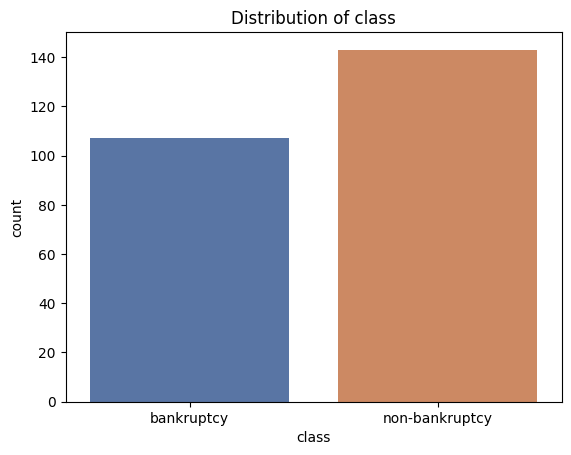

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="class", data=df , hue="class" , palette="deep")
plt.title(f'Distribution of class')
plt.show()


In [11]:
df["class"].value_counts()

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64

In [12]:
columns_to_convert = ["industrial_risk","management_risk","financial_flexibility","credibility","competitiveness","operating_risk" ]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

In [13]:
df.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object

In [14]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

## Outliers Detection


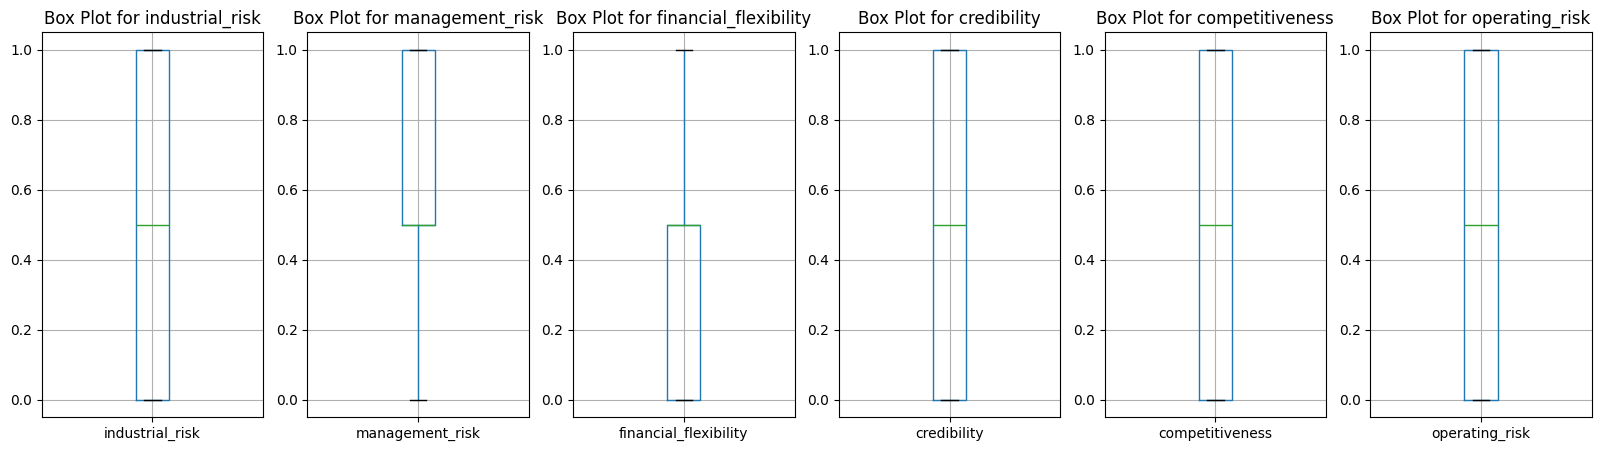

In [16]:
#outlier detection using box plot

columns = ["industrial_risk","management_risk","financial_flexibility","credibility","competitiveness","operating_risk"]
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 5))

for ax, col in zip(axes,columns ):
    df.boxplot(column=col, ax=ax)
    ax.set_title(f'Box Plot for {col}')

In [17]:
#outlier detection using IQR
outliers = {}
def iqr_detect_outlier(df, column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    outliers=df[(df[column]<lower_bound) | (df[column]>upper_bound)]
    return outliers

for col in columns:
    outliers[col] = iqr_detect_outlier(df, col)


for col, outlier_data in outliers.items():
    if outlier_data.empty:
        print(f"No outliers in {col}")
    else:
        print(f"Outliers in {col}:")
        print(outlier_data, "\n")

No outliers in industrial_risk
No outliers in management_risk
No outliers in financial_flexibility
No outliers in credibility
No outliers in competitiveness
No outliers in operating_risk


In [18]:
#outliers detection using zscore
from scipy import stats
import numpy as np

def zscore_detect_outliers(df, column):
    z_scores = stats.zscore(df[column])
    abs_z_scores = np.abs(z_scores)
    outliers = df[abs_z_scores >3]
    return outliers

outliers_zscore = {}

for col in columns:
    outliers_zscore[col] = zscore_detect_outliers(df, col)

# Print the outliers
for col, outlier_data in outliers_zscore.items():
    if outlier_data.empty:
        print(f"No outliers in {col}")
    else:
        print(f"Outliers in {col} (Z-score):")
        print(outlier_data, "\n")

No outliers in industrial_risk
No outliers in management_risk
No outliers in financial_flexibility
No outliers in credibility
No outliers in competitiveness
No outliers in operating_risk


No outliers are found by visual and statistical inspection i.e box plot , z-score an IQR


In [19]:
df.dtypes


industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object

# Visualization

### categorical


cat

In [20]:
cat_cols=df.select_dtypes(include='object')
cat_cols

,class
0,bankruptcy
1,bankruptcy
2,bankruptcy
3,bankruptcy
4,bankruptcy
...,...
245,non-bankruptcy
246,non-bankruptcy
247,non-bankruptcy
248,non-bankruptcy


In [21]:
cat_cols.dtypes

class    object
dtype: object

In [22]:
num_cols=df.select_dtypes(exclude='object')
num_cols

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [23]:
num_cols.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
dtype: object

In [24]:
cat_cols.value_counts()

class         
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64

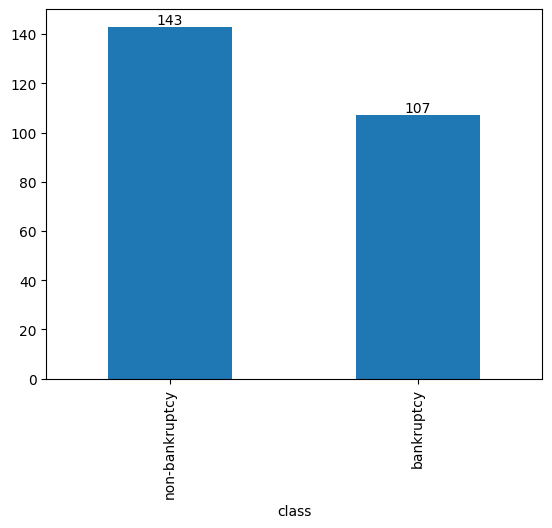

In [25]:
values = df['class'].value_counts()
ax=values.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()


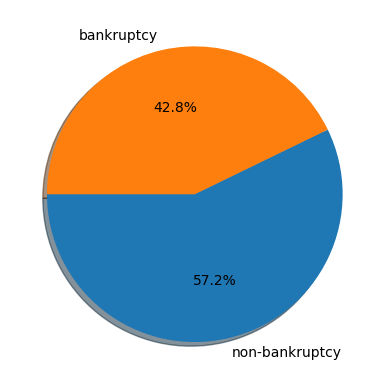

In [26]:
keys = df['class'].value_counts().keys()  # keys
values = df['class'].value_counts().to_list() # values
plt.pie(x=values,
        labels=keys,
        autopct="%0.1f%%",
        shadow=True,
        startangle=180,
        radius=1)
plt.show()

# numerical

In [27]:
num_cols.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
dtype: object

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

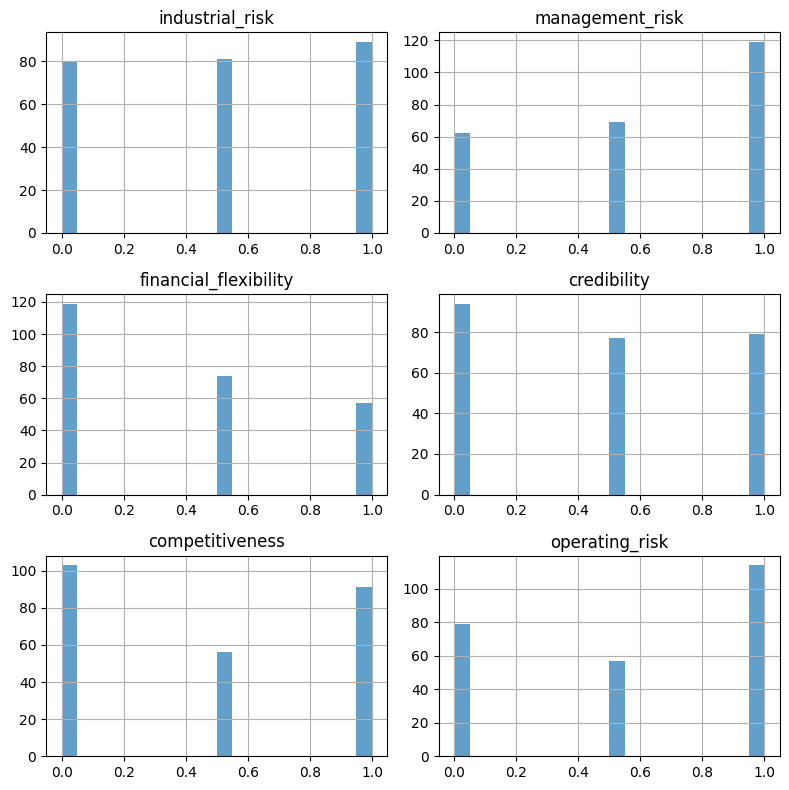

In [29]:
df.hist(figsize=(8, 8), bins=20, alpha=0.7)
plt.tight_layout()
plt.show()

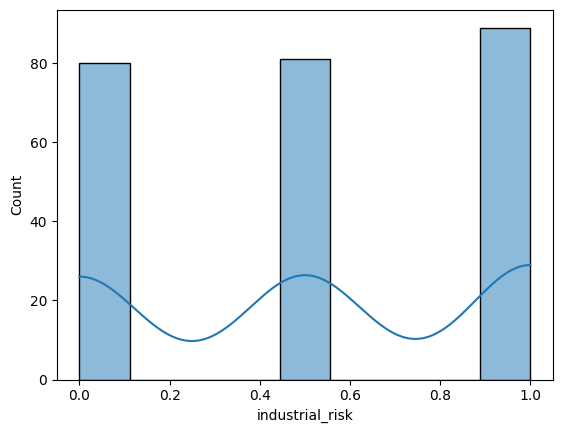

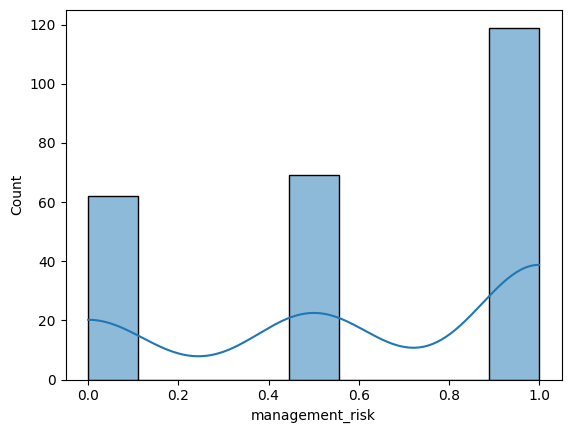

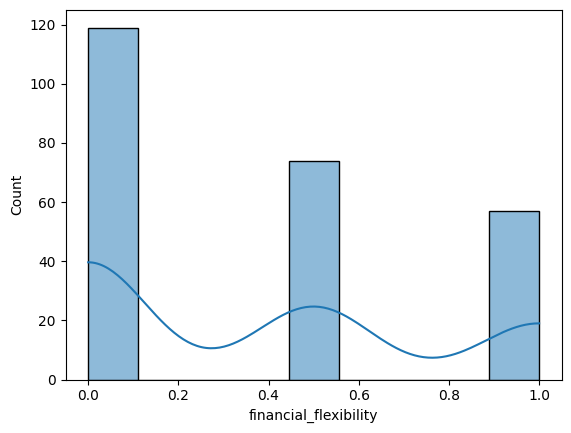

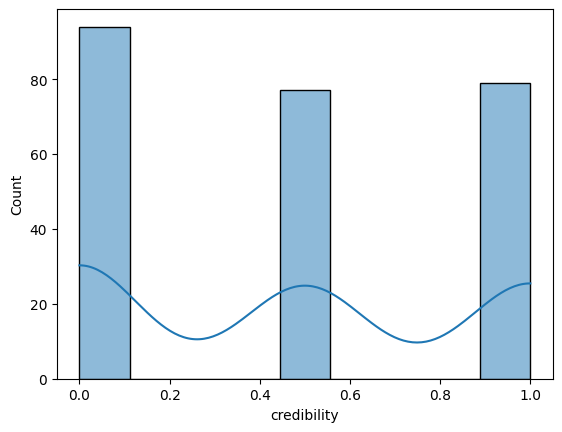

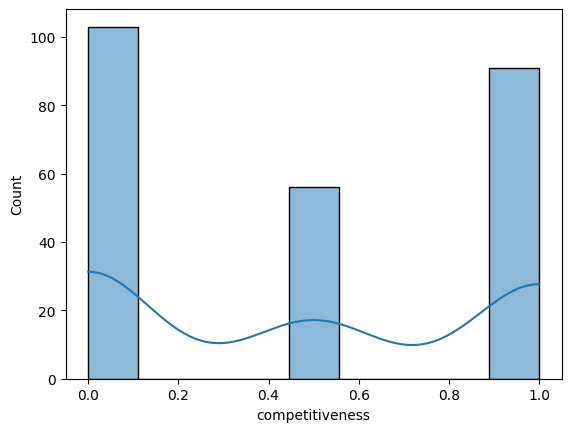

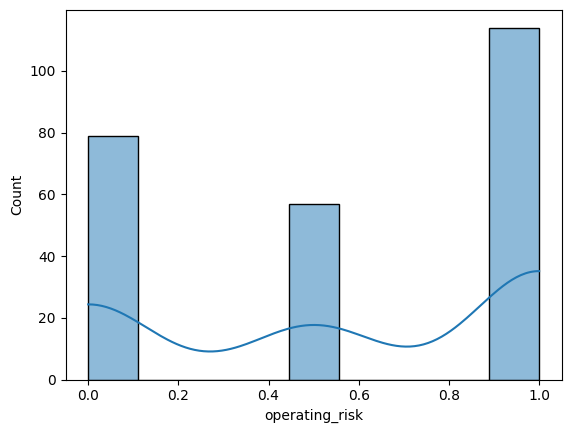

In [30]:
for i in num_cols:
    sns.histplot(df[i], kde = True)
    plt.show()

In [31]:
df.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object

# bivarite

In [32]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


class            bankruptcy  non-bankruptcy
industrial_risk                            
0.0                      26              54
0.5                      28              53
1.0                      53              36


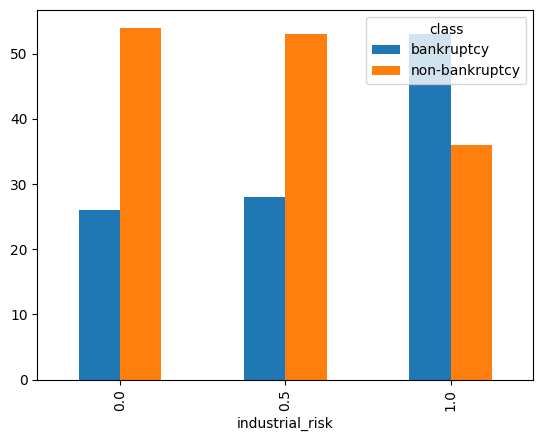

In [33]:
col1=df['industrial_risk']
col2=df['class']
industrial_risk=pd.crosstab(col1,col2)
print(industrial_risk)
industrial_risk.plot(kind='bar')
plt.show()

Insight:- bankruptcy is more in high(1) industrial_risk
very less in low , and medium industrial_risk

class            bankruptcy  non-bankruptcy
management_risk                            
0.0                      11              51
0.5                      23              46
1.0                      73              46


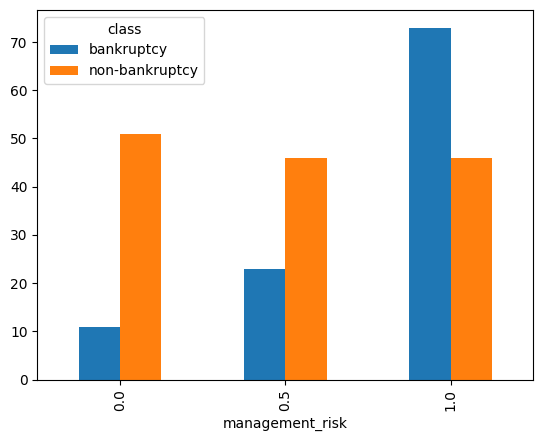

In [34]:
col1=df['management_risk']
col2=df['class']
management_risk=pd.crosstab(col1,col2)
print(management_risk)
management_risk.plot(kind='bar')
plt.show()

Insights:- In managemnet_risk the bankruptcy is high in 1
and non bankruptcy is relatively same in all low , medium , high risk

class                  bankruptcy  non-bankruptcy
financial_flexibility                            
0.0                           102              17
0.5                             4              70
1.0                             1              56


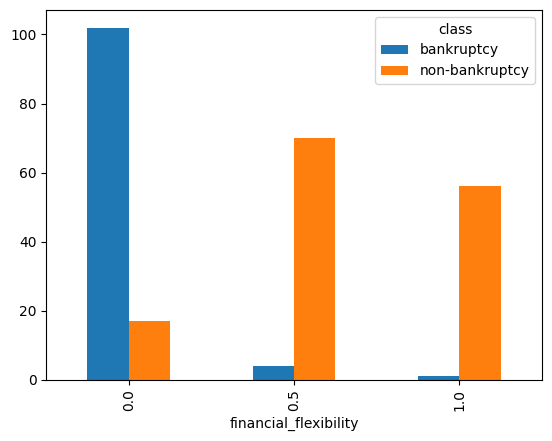

In [35]:
col1=df['financial_flexibility']
col2=df['class']
financial_flexibility=pd.crosstab(col1,col2)
print(financial_flexibility	)
financial_flexibility.plot(kind='bar')
plt.show()

Insight:-in financial_flexibility the bankruptcy rate is very high in low flexibility and non bankruptcy is high in medium and high felexibility

class        bankruptcy  non-bankruptcy
credibility                            
0.0                  87               7
0.5                  17              60
1.0                   3              76


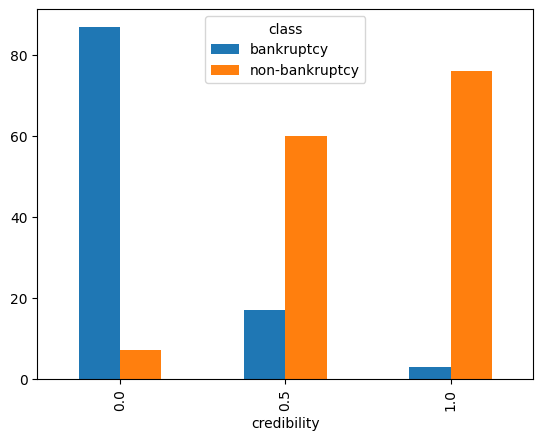

In [36]:
col1=df['credibility']
col2=df['class']
credibility=pd.crosstab(col1,col2)
print(credibility)
credibility.plot(kind='bar')
plt.show()

Insights- Bankruptcy is very high in low credibility and a company is prone to be bankrupt if the credibility is high

class            bankruptcy  non-bankruptcy
competitiveness                            
0.0                     103               0
0.5                       4              52
1.0                       0              91


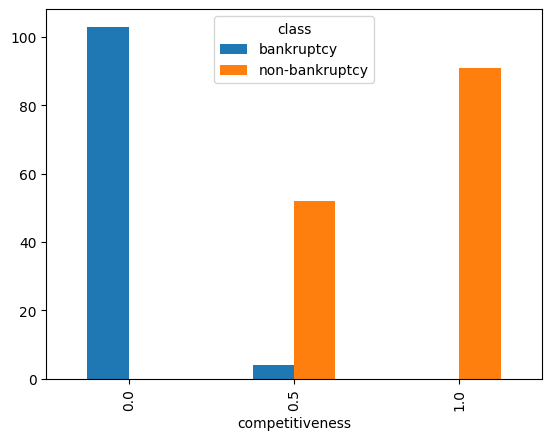

In [37]:
col1=df['competitiveness']
col2=df['class']
competitiveness=pd.crosstab(col1,col2)
print(competitiveness)
competitiveness.plot(kind='bar')
plt.show()

Insight ;- competitiveness-0 more prone to bankruptcy
competitveness -0.5 ,1 less prone to bankruptcy

class           bankruptcy  non-bankruptcy
operating_risk                            
0.0                     19              60
0.5                     24              33
1.0                     64              50


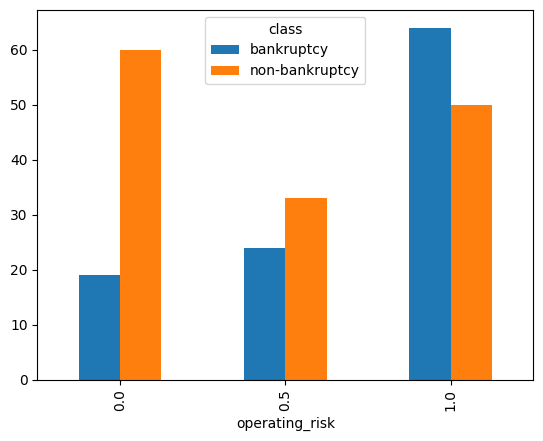

In [38]:
col1=df['operating_risk']
col2=df['class']
operating_risk=pd.crosstab(col1,col2)
print(operating_risk)
operating_risk.plot(kind='bar')
plt.show()

insight:- The company with most low risk(0) operating_risk value is less prone to bankruptcy and high risk(1) operating_risk value is more prone to be bankrupt

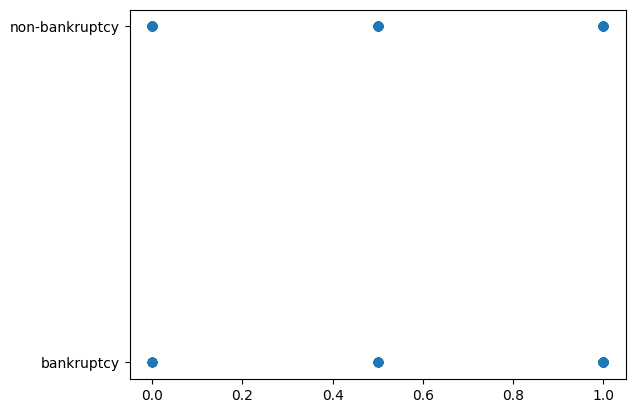

In [39]:
x=df['management_risk']
y=df['class']
plt.scatter(x,y)
# plt.plot(col1,col2)
plt.show()

<Axes: >

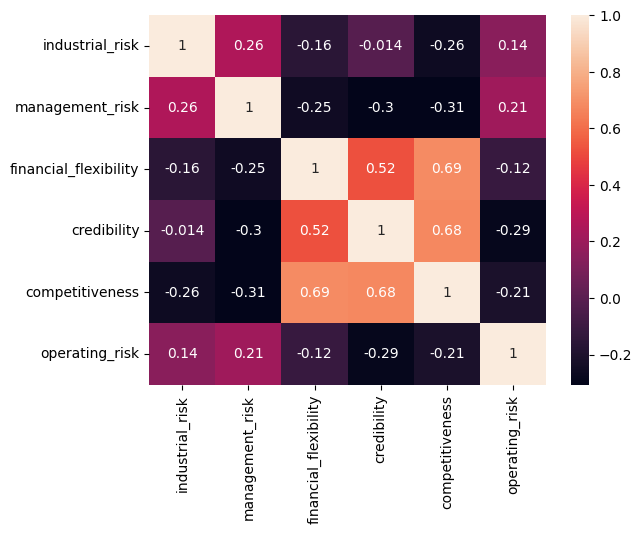

In [40]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

Insight :- In heatmap we can observe the positive, negative correlation between features
* industrial_risk , managemnet_risk,operating_risk are positively correlated with each other
* financial_flexibility, credibility , competitiveness are positively correlated
* othere features are negatively correlated with eachother

##Feature Engineering

In [41]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['class_encoded'] = label_encoder.fit_transform(df['class'])


In [42]:
#dropping class column

df.drop("class",inplace=True , axis=1)

In [43]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_encoded
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


## Model Building

In [44]:
# Input
x = df.drop("class_encoded",axis=1)
y=df["class_encoded"]

In [45]:
x

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [46]:
y

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: class_encoded, Length: 250, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

##Logistic regression
* works well with binary classfication

In [48]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred1 = model1.predict(x_test)
y_pred1

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [50]:
## model performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy)

1.0


In [51]:
## model performance on train data
model1.score(x_train, y_train)

0.995

In [52]:
## model perfomance on test data
model1.score(x_test, y_test)

1.0

In [53]:
# L2 = Ridge regularization
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 50, max_iter = 100, tol = 0.1)

ridge_reg.fit(x_train, y_train)
Ridge(alpha=50, max_iter=100, tol=0.1)
print(ridge_reg.score(x_test, y_test))

print(ridge_reg.score(x_train, y_train))

y_ridge_pred = ridge_reg.predict(x_test)

0.7359611982440739
0.7638732779460546


In [54]:
#L1 regularization
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 50, max_iter = 100, tol = 0.1)

lasso_reg.fit(x_train, y_train)
Lasso(alpha=50, max_iter=100, tol=0.1)
print(lasso_reg.score(x_test, y_test))

print(lasso_reg.score(x_train, y_train))

print(lasso_reg.coef_)

-0.00041050903119876914
0.0
[-0. -0.  0.  0.  0. -0.]


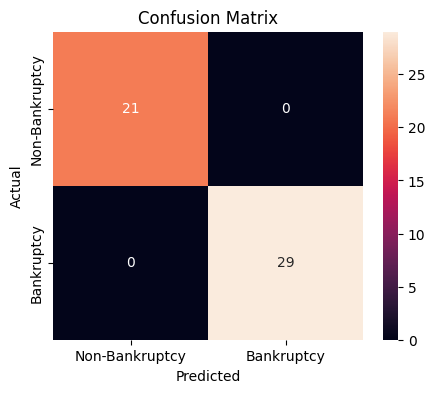

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Non-Bankruptcy', 'Bankruptcy'], yticklabels=['Non-Bankruptcy', 'Bankruptcy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [56]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred1)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5,metric="euclidean")

In [58]:
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [59]:
y_pred2 = knn_classifier.predict(x_test)
y_pred2

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [60]:
knn_acc = accuracy_score(y_test,y_pred2)
knn_acc

1.0

In [61]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred2)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



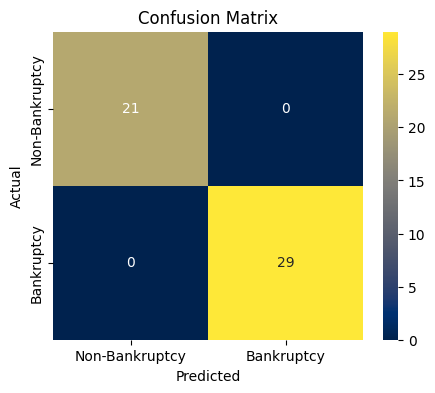

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d',cmap = plt.get_cmap('cividis'),xticklabels=['Non-Bankruptcy', 'Bankruptcy'], yticklabels=['Non-Bankruptcy', 'Bankruptcy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [63]:
knn_classifier.score(x_train, y_train)

0.995

In [64]:
knn_classifier.score(x_test, y_test)


1.0

##SVM

In [65]:
from sklearn.svm import SVC
linear = SVC(kernel='linear',probability=True)


linear.fit(x_train, y_train)

y_pred_linear = linear.predict(x_test)


accuracy = accuracy_score(y_test, y_pred_linear)
accuracy

1.0

In [82]:
from sklearn.svm import SVC
poly = SVC(kernel='poly', probability=True)

poly.fit(x_train, y_train)
y_pred3 = poly.predict(x_test)

poly_accuracy = accuracy_score(y_test, y_pred3)
print(accuracy)

from sklearn.metrics import confusion_matrix
poly_cm = confusion_matrix(y_test, y_pred3)
print(cm)


1.0
[[21  0]
 [ 1 28]]


In [83]:
from sklearn.svm import SVC
rbf = SVC(kernel='rbf', probability=True)

rbf.fit(x_train, y_train)
y_pred3 = rbf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred3)
print(accuracy)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)
print(cm)

1.0
[[21  0]
 [ 0 29]]


In [84]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred3)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [85]:
model_accuracy = linear.score(x_train, y_train)

In [86]:
linear.score(x_test, y_test)

1.0

In [87]:
poly.score(x_train, y_train)

1.0

In [88]:
poly.score(x_test, y_test)

0.98

In [89]:
rbf.score(x_test, y_test)

1.0

In [90]:
rbf.score(x_train,y_train)

1.0

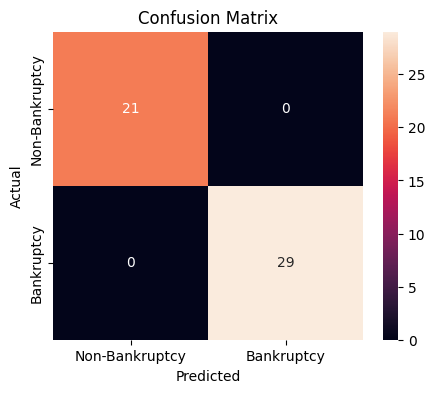

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Non-Bankruptcy', 'Bankruptcy'], yticklabels=['Non-Bankruptcy', 'Bankruptcy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [92]:
import joblib # saving the model as pkl file
joblib.dump(poly, 'svm_model.pkl')


['svm_model.pkl']

In [93]:
joblib.dump(poly_accuracy, 'model_accuracy.pkl')

['model_accuracy.pkl']

In [96]:
joblib.dump(poly_cm, 'cm.pkl')

['cm.pkl']

In [97]:
joblib.dump(x_test, 'x_test.pkl')

['x_test.pkl']